# [Deep Learning](https://github.com/M-Sc-AUT/M.Sc-Computer-Architecture/tree/main/Deep%20Learning) - Spring 2024
#### [Reza Adinepour](https://github.com/rezaAdinepour)
#### Stu.ID: 402131055

## Part B:
In this part we should create high order fitures and train the model with them

we create $x^2, x^3$ as a new input fitures

### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score


%matplotlib inline

### check GPU availability

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Read dataset and data visualization

In [3]:
# read dataset from .txt file and remove first 8 row and set new header with this name: x, y, label
df = pd.read_csv("data.txt", skiprows=8, header=None, names=['x', 'y', 'label'])

# split dataset into the inputs x and the outputs y (labels)
X = df[['x', 'y']]
y = df['label']

print("shape of data frame is:", df.shape)
df

shape of data frame is: (4500, 3)


,x,y,label
0,4.780310,2.698320,0
1,-2.273710,5.750180,0
2,-4.817170,-2.209610,0
3,-9.526940,0.659360,0
4,1.864400,-5.019510,0
...,...,...,...
4495,-4.327500,-0.210256,1
4496,-1.077300,1.279540,1
4497,-2.377350,-3.078130,1
4498,0.508152,0.432983,1


### Convert data to PyTorch tensor and make high order input fitures

In [6]:
X_tensor = torch.tensor(X.values, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y.values, dtype=torch.float32).to(device).view(-1, 1)


# create high order fitures
X2_tensor = X_tensor ** 2
X3_tensor = X_tensor ** 3

### Convert data to pytorch tensors and Split data
* Training set: 70%
* Test set: 20%
* Validation set: 10%

In [8]:
X2_train, X2_temp, y_train, y_temp = train_test_split(X2_tensor, y_tensor, test_size=0.3, random_state=42) 
X2_val, X2_test, y_val, y_test = train_test_split(X2_temp, y_temp, test_size=2/3, random_state=42)

X3_train, X3_temp, y_train, y_temp = train_test_split(X3_tensor, y_tensor, test_size=0.3, random_state=42) 
X3_val, X3_test, y_val, y_test = train_test_split(X3_temp, y_temp, test_size=2/3, random_state=42)

### divide data into two classes

In [9]:
# divide data into two classes
X2_class0 = X2_tensor[y_tensor.flatten() == 0]
X2_class1 = X2_tensor[y_tensor.flatten() == 1]

X3_class0 = X3_tensor[y_tensor.flatten() == 0]
X3_class1 = X3_tensor[y_tensor.flatten() == 1]

### Plot dataset

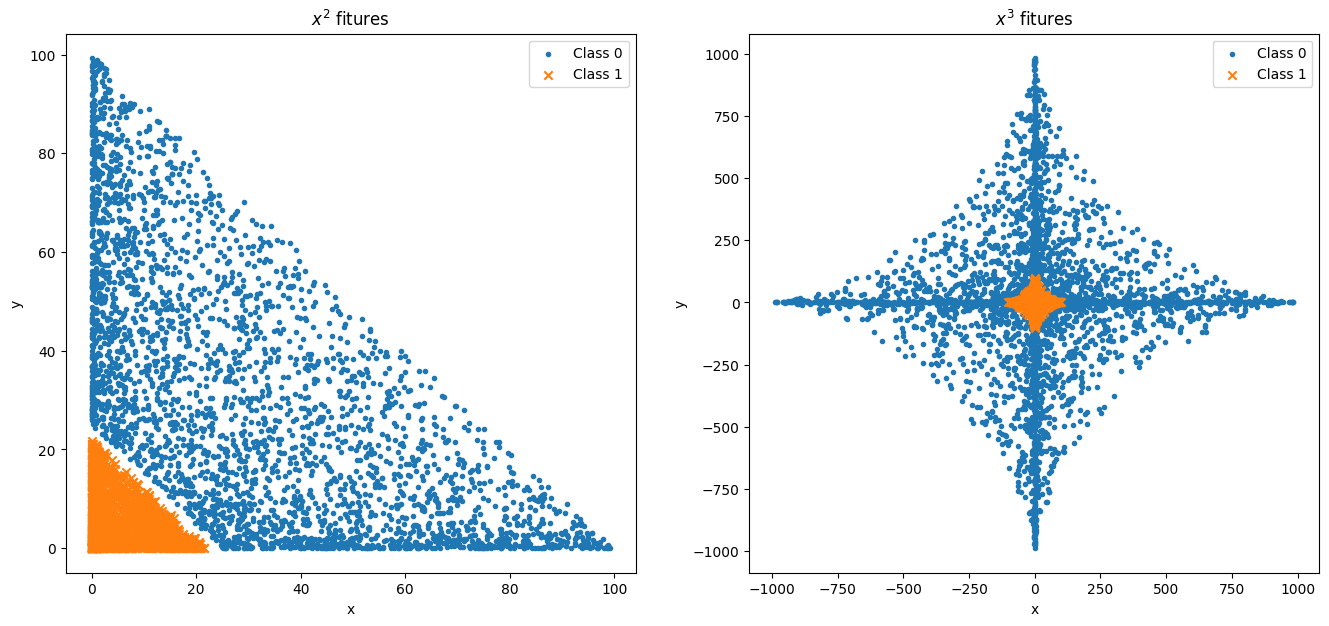

In [33]:
plt.figure(figsize=(25, 7))

plt.subplot(1, 3, 1)
plt.title("$x^2$ fitures")
plt.scatter(X2_class0[:, 0].cpu().numpy(), X2_class0[:, 1].cpu().numpy(), label="Class 0", marker='.')
plt.scatter(X2_class1[:, 0].cpu().numpy(), X2_class1[:, 1].cpu().numpy(), label="Class 1", marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


plt.subplot(1, 3, 2)
plt.title("$x^3$ fitures")
plt.scatter(X3_class0[:, 0].cpu().numpy(), X3_class0[:, 1].cpu().numpy(), label="Class 0", marker='.')
plt.scatter(X3_class1[:, 0].cpu().numpy(), X3_class1[:, 1].cpu().numpy(), label="Class 1", marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

### Define single layer perceptron class
* Neuron number: 1
* Number of inputs: 2
* Activation function: Sigmoid

In [13]:
# define single layer perceptron class using pytorch
class single_layer_perceptron(nn.Module):
    def __init__(self, input_size):
        super(single_layer_perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

### initialize parameters of model
* Number of epochs: 500
* Learning rate: 0.01
* Loss function: Mean Squared Error
* Optimizer: Stochastic Gradient Descent

In [19]:
# initialize parameters of model

X2_model = single_layer_perceptron(X2_train.size(1)).to(device) # create model
X3_model = single_layer_perceptron(X3_train.size(1)).to(device) # create model

epochs = 500

# define loss function and optimizer
criterion = nn.MSELoss() # unsing mean squared error for loss function
X2_optimizer = optim.SGD(X2_model.parameters(), lr=0.01) # using stochastic gradient descent for optimization
X3_optimizer = optim.SGD(X3_model.parameters(), lr=0.01) # using stochastic gradient descent for optimization

# convert labels to integer type
y_train = y_train.long()
y_test = y_test.long()
y_val = y_val.long()

X2_train_losses = []
X2_train_accuracies = []
X2_val_losses = []
X2_val_accuracies = []
X2_test_losses = []
X2_test_accuracies = []


X3_train_losses = []
X3_train_accuracies = []
X3_val_losses = []
X3_val_accuracies = []
X3_test_losses = []
X3_test_accuracies = []

### Train phase for $x^2$

In [20]:
for epoch in range(epochs):
    # forward pass
    X2_outputs = X2_model(X2_train)
    X2_loss = criterion(X2_outputs, y_train.float())

    # backward and optimize
    X2_optimizer.zero_grad()
    X2_loss.backward()
    X2_optimizer.step()

    # calculate accuracy
    X2_predicted = torch.round(X2_outputs.data)
    X2_correct = (X2_predicted == y_train).sum().item()
    X2_train_accuracy = X2_correct / y_train.size(0)
    X2_train_f1 = f1_score(y_train.cpu().numpy(), X2_predicted.cpu().numpy())

    # calculate loss and accuracy for validation set
    X2_val_outputs = X2_model(X2_val)
    X2_val_loss = criterion(X2_val_outputs, y_val.float())
    X2_val_predicted = torch.round(X2_val_outputs.data)
    X2_val_correct = (X2_val_predicted == y_val).sum().item()
    X2_val_accuracy = X2_val_correct / y_val.size(0)
    X2_val_f1 = f1_score(y_val.cpu().numpy(), X2_val_predicted.cpu().numpy())

    # store losses and accuracies
    X2_train_losses.append(X2_loss.item())
    X2_train_accuracies.append(X2_train_accuracy)
    X2_val_losses.append(X2_val_loss.item())
    X2_val_accuracies.append(X2_val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {X2_loss.item():.4f}, Accuracy: {X2_train_accuracy:.4f}, F1 Score: {X2_train_f1:.4f}")
print('-'*80)
print(f"Validation Loss: {sum(X2_val_losses) / len(X2_val_losses):.4f}, Validation Accuracy: {sum(X2_val_accuracies) / len(X2_val_accuracies):.4f}, Validation F1 Score: {X2_val_f1:.4f}")
print("-"*80)

Epoch 1/500, Loss: 0.1853, Accuracy: 0.7321, F1 Score: 0.2053
Epoch 2/500, Loss: 0.1836, Accuracy: 0.7333, F1 Score: 0.2120
Epoch 3/500, Loss: 0.1818, Accuracy: 0.7337, F1 Score: 0.2137
Epoch 4/500, Loss: 0.1799, Accuracy: 0.7340, F1 Score: 0.2154
Epoch 5/500, Loss: 0.1779, Accuracy: 0.7362, F1 Score: 0.2270
Epoch 6/500, Loss: 0.1760, Accuracy: 0.7375, F1 Score: 0.2335
Epoch 7/500, Loss: 0.1739, Accuracy: 0.7387, F1 Score: 0.2401
Epoch 8/500, Loss: 0.1719, Accuracy: 0.7406, F1 Score: 0.2498
Epoch 9/500, Loss: 0.1698, Accuracy: 0.7422, F1 Score: 0.2578
Epoch 10/500, Loss: 0.1677, Accuracy: 0.7441, F1 Score: 0.2673
Epoch 11/500, Loss: 0.1656, Accuracy: 0.7457, F1 Score: 0.2751
Epoch 12/500, Loss: 0.1635, Accuracy: 0.7473, F1 Score: 0.2829
Epoch 13/500, Loss: 0.1614, Accuracy: 0.7495, F1 Score: 0.2936
Epoch 14/500, Loss: 0.1595, Accuracy: 0.7511, F1 Score: 0.3012
Epoch 15/500, Loss: 0.1576, Accuracy: 0.7533, F1 Score: 0.3118
Epoch 16/500, Loss: 0.1558, Accuracy: 0.7559, F1 Score: 0.3237
E

### plot train and validation loss and accuracy

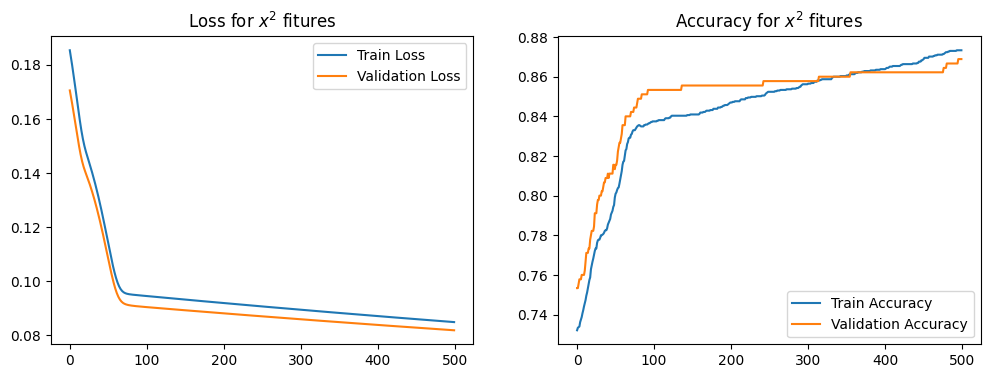

In [29]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("Loss for $x^2$ fitures")
plt.plot(X2_train_losses, label="Train Loss")
plt.plot(X2_val_losses, label="Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy for $x^2$ fitures")
plt.plot(X2_train_accuracies, label="Train Accuracy")
plt.plot(X2_val_accuracies, label="Validation Accuracy")
plt.legend()

### Test phase for $x^2$

In [22]:
X2_test_outputs = X2_model(X2_test)
X2_test_loss = criterion(X2_test_outputs, y_test.float())
X2_test_predicted = torch.round(X2_test_outputs.data)
X2_test_correct = (X2_test_predicted == y_test).sum().item()
X2_test_accuracy = X2_test_correct / y_test.size(0)
X2_test_f1 = f1_score(y_test.cpu().numpy(), X2_test_predicted.cpu().numpy())
X2_test_cm = confusion_matrix(y_test.cpu().numpy(), X2_test_predicted.cpu().numpy())


# calculate F1 score and confusion matrix for training and validation set
X2_train_predicted = torch.round(X2_model(X2_train).data)
X2_train_f1 = f1_score(y_train.cpu().numpy(), X2_train_predicted.cpu().numpy())
X2_train_cm = confusion_matrix(y_train.cpu().numpy(), X2_train_predicted.cpu().numpy())
X2_val_cm = confusion_matrix(y_val.cpu().numpy(), X2_val_predicted.cpu().numpy())

print(f"Test loss: {X2_test_loss:.4f}, Test Accuracy: {X2_test_accuracy:.4f}, Test F1 Score: {X2_test_f1:.4f}")
print("Final weights:", X2_model.fc.weight.data)

Test loss: 0.0827, Test Accuracy: 0.8856, Test F1 Score: 0.7685
Final weights: tensor([[-0.0510, -0.0524]], device='cuda:0')


### plot confusion matrices

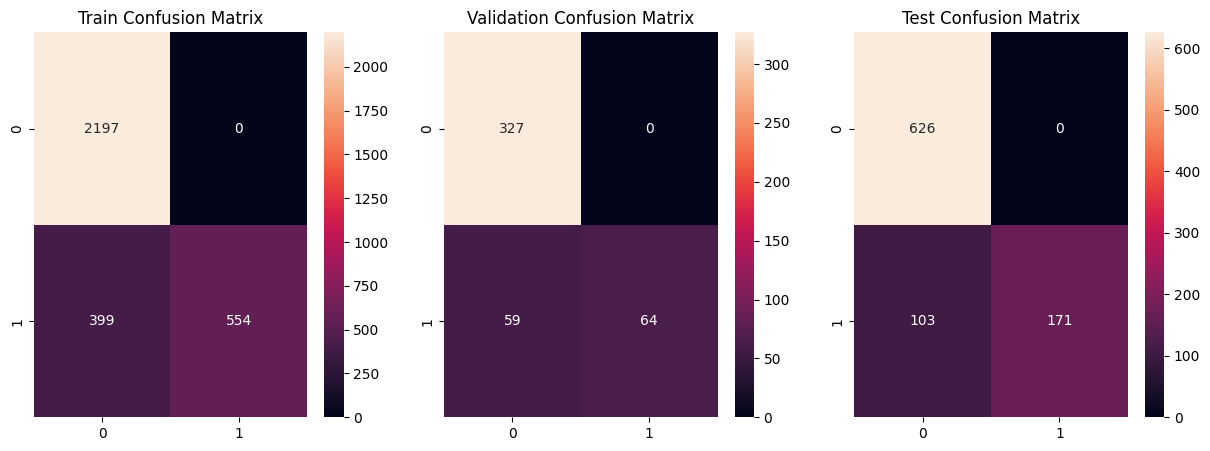

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(X2_train_cm, annot=True, fmt='d', ax=axs[0])
axs[0].set_title("Train Confusion Matrix")

sns.heatmap(X2_val_cm, annot=True, fmt='d', ax=axs[1])
axs[1].set_title("Validation Confusion Matrix")

sns.heatmap(X2_test_cm, annot=True, fmt='d', ax=axs[2])
axs[2].set_title("Test Confusion Matrix")

plt.show()

### Train phase for $x^3$

In [24]:
for epoch in range(epochs):
    # forward pass
    X3_outputs = X3_model(X3_train)
    X3_loss = criterion(X3_outputs, y_train.float())

    # backward and optimize
    X3_optimizer.zero_grad()
    X3_loss.backward()
    X3_optimizer.step()

    # calculate accuracy
    X3_predicted = torch.round(X3_outputs.data)
    X3_correct = (X3_predicted == y_train).sum().item()
    X3_train_accuracy = X3_correct / y_train.size(0)
    X3_train_f1 = f1_score(y_train.cpu().numpy(), X3_predicted.cpu().numpy())

    # calculate loss and accuracy for validation set
    X3_val_outputs = X3_model(X3_val)
    X3_val_loss = criterion(X3_val_outputs, y_val.float())
    X3_val_predicted = torch.round(X3_val_outputs.data)
    X3_val_correct = (X3_val_predicted == y_val).sum().item()
    X3_val_accuracy = X3_val_correct / y_val.size(0)
    X3_val_f1 = f1_score(y_val.cpu().numpy(), X3_val_predicted.cpu().numpy())

    # store losses and accuracies
    X3_train_losses.append(X3_loss.item())
    X3_train_accuracies.append(X3_train_accuracy)
    X3_val_losses.append(X3_val_loss.item())
    X3_val_accuracies.append(X3_val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {X3_loss.item():.4f}, Accuracy: {X3_train_accuracy:.4f}, F1 Score: {X3_train_f1:.4f}")
print('-'*80)
print(f"Validation Loss: {sum(X3_val_losses) / len(X3_val_losses):.4f}, Validation Accuracy: {sum(X3_val_accuracies) / len(X3_val_accuracies):.4f}, Validation F1 Score: {X3_val_f1:.4f}")
print("-"*80)

Epoch 1/500, Loss: 0.4982, Accuracy: 0.4895, F1 Score: 0.3604
Epoch 2/500, Loss: 0.4982, Accuracy: 0.4895, F1 Score: 0.3604
Epoch 3/500, Loss: 0.4982, Accuracy: 0.4895, F1 Score: 0.3604
Epoch 4/500, Loss: 0.4982, Accuracy: 0.4895, F1 Score: 0.3604
Epoch 5/500, Loss: 0.4982, Accuracy: 0.4895, F1 Score: 0.3604
Epoch 6/500, Loss: 0.4982, Accuracy: 0.4895, F1 Score: 0.3604
Epoch 7/500, Loss: 0.4982, Accuracy: 0.4895, F1 Score: 0.3604
Epoch 8/500, Loss: 0.4982, Accuracy: 0.4895, F1 Score: 0.3604
Epoch 9/500, Loss: 0.4982, Accuracy: 0.4895, F1 Score: 0.3604
Epoch 10/500, Loss: 0.4981, Accuracy: 0.4895, F1 Score: 0.3604
Epoch 11/500, Loss: 0.4981, Accuracy: 0.4895, F1 Score: 0.3604
Epoch 12/500, Loss: 0.4981, Accuracy: 0.4895, F1 Score: 0.3604
Epoch 13/500, Loss: 0.4981, Accuracy: 0.4895, F1 Score: 0.3604
Epoch 14/500, Loss: 0.4981, Accuracy: 0.4895, F1 Score: 0.3604
Epoch 15/500, Loss: 0.4981, Accuracy: 0.4895, F1 Score: 0.3604
Epoch 16/500, Loss: 0.4981, Accuracy: 0.4895, F1 Score: 0.3604
E

### plot train and validation loss and accuracy

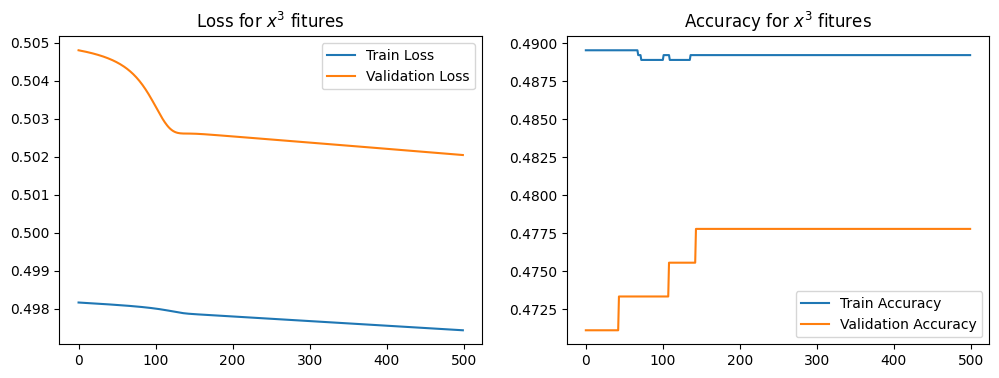

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("Loss for $x^3$ fitures")
plt.plot(X3_train_losses, label="Train Loss")
plt.plot(X3_val_losses, label="Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy for $x^3$ fitures")
plt.plot(X3_train_accuracies, label="Train Accuracy")
plt.plot(X3_val_accuracies, label="Validation Accuracy")
plt.legend()

### Test phase for $x^3$

In [30]:
# test phase
X3_test_outputs = X3_model(X3_test)
X3_test_loss = criterion(X3_test_outputs, y_test.float())
X3_test_predicted = torch.round(X3_test_outputs.data)
X3_test_correct = (X3_test_predicted == y_test).sum().item()
X3_test_accuracy = X3_test_correct / y_test.size(0)
X3_test_f1 = f1_score(y_test.cpu().numpy(), X3_test_predicted.cpu().numpy())
X3_test_cm = confusion_matrix(y_test.cpu().numpy(), X3_test_predicted.cpu().numpy())


# calculate F1 score and confusion matrix for training and validation set
X3_train_predicted = torch.round(X3_model(X3_train).data)
X3_train_f1 = f1_score(y_train.cpu().numpy(), X3_train_predicted.cpu().numpy())
X3_train_cm = confusion_matrix(y_train.cpu().numpy(), X3_train_predicted.cpu().numpy())
X3_val_cm = confusion_matrix(y_val.cpu().numpy(), X3_val_predicted.cpu().numpy())

print(f"Test loss: {X3_test_loss:.4f}, Test Accuracy: {X3_test_accuracy:.4f}, Test F1 Score: {X3_test_f1:.4f}")
print("Final weights:", X3_model.fc.weight.data)

Test loss: 0.4883, Test Accuracy: 0.5000, Test F1 Score: 0.3626
Final weights: tensor([[-0.5944,  0.6600]], device='cuda:0')


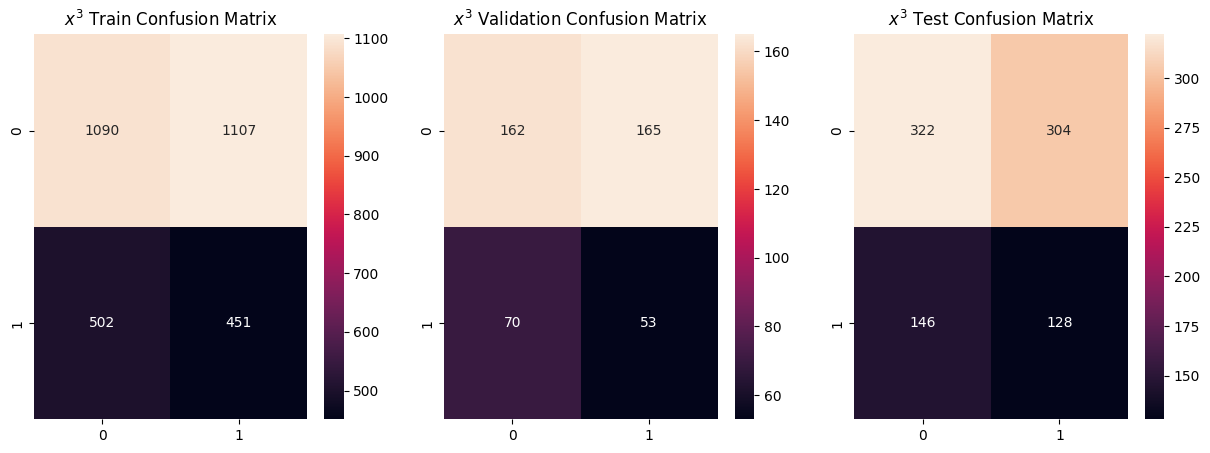

In [32]:
# plot confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(X3_train_cm, annot=True, fmt='d', ax=axs[0])
axs[0].set_title("$x^3$ Train Confusion Matrix")

sns.heatmap(X3_val_cm, annot=True, fmt='d', ax=axs[1])
axs[1].set_title("$x^3$ Validation Confusion Matrix")

sns.heatmap(X3_test_cm, annot=True, fmt='d', ax=axs[2])
axs[2].set_title("$x^3$ Test Confusion Matrix")

plt.show()